# A Data-Driven and Interpretable Approach to Traffic Crash Severity Prediction 

# Business Understanding
## Business Overview

Road traffic crashes remain a major public safety challenge, leading to injuries, loss of life, and substantial economic costs. While large volumes of traffic crash data are routinely collected, there is a need for analytical approaches that not only predict crash-related outcomes but also clearly explain the factors that contribute to accidents.

This project develops a machine learning framework that uses both interpretable (white-box) models and more complex (black-box) models to predict the primary contributory cause of a traffic crash. The models leverage information about vehicles, people involved, roadway characteristics, traffic controls, and environmental conditions to identify patterns associated with different crash causes.

White-box models are used to provide transparent, rule-based insights that are easily understood by non-technical stakeholders, while black-box models are employed to capture more complex relationships within the data. By comparing these approaches, the project balances predictive performance with explainability.

The resulting insights are intended to support vehicle safety boards, transportation agencies, and city authorities in identifying high-risk crash causes, prioritizing safety interventions, and designing evidence-based policies aimed at reducing preventable traffic accidents.

## Problem Statement
Transportation agencies and safety organizations often rely on descriptive statistics and manual reporting to understand the causes of traffic crashes. While useful, these approaches may fail to capture complex interactions among driver behavior, vehicle characteristics, roadway design, and environmental conditions.

The core problem addressed in this project is the lack of interpretable and accurate predictive tools for identifying the primary contributory cause of traffic crashes. High-performing black-box models can achieve strong predictive accuracy but often lack transparency, making their outputs difficult to trust or justify in policy and safety contexts. Conversely, fully interpretable models may sacrifice predictive performance.

This project seeks to address this challenge by developing and evaluating both white-box and black-box machine learning models to predict crash contributory causes. By comparing model performance and interpretability, the project aims to identify an approach that provides reliable predictions while offering clear explanations that can be communicated to non-technical decision-makers. The ultimate goal is to support transparent, accountable, and data-driven traffic safety interventions.

## Business Objectives
The primary objective of this project is to support traffic safety decision-making by developing an interpretable machine learning model that predicts the primary contributory cause of a traffic crash using information related to vehicles, occupants, roadway characteristics, traffic controls, and environmental conditions.
By identifying the most likely cause of a crash, this project aims to help transportation authorities and safety organizations better understand underlying risk patterns and design targeted strategies to reduce traffic accidents.

### Specific Objectives
1. Predict the Primary Contributory Cause of Crashes:
Develop supervised machine learning models capable of classifying traffic crashes according to their primary contributory cause based on vehicle-level, person-level, roadway, and environmental features.

2. Ensure Model Interpretability:
Apply interpretable modeling techniques and explanation methods to make both global model behavior and individual crash predictions understandable, allowing stakeholders to see how specific factors influence predicted crash causes.

3. Identify High-Impact Risk Factors:
Determine the most influential factors associated with different contributory causes of crashes, including roadway conditions, environmental factors, vehicle characteristics, driver behavior, and temporal patterns.

4. Compare Interpretability and Performance Trade-offs:
Evaluate and compare interpretable (white-box) models with more complex (black-box) models to understand the trade-offs between predictive accuracy and explainability when predicting crash causes.

5. Support Actionable Safety Interventions:
Translate model insights into practical recommendations that can inform infrastructure improvements, targeted enforcement strategies, driver education programs, and policy decisions aimed at reducing preventable crash causes.

6. Promote Transparent and Accountable Decision-Making:
Provide clear, defensible explanations that can be effectively communicated to non-technical stakeholders such as vehicle safety boards and city transportation authorities, supporting responsible and evidence-based traffic safety initiatives.

## Data Understanding.

This project uses the Traffic Crashes dataset provided by the City of Chicago and collected under the jurisdiction of the Chicago Police Department (CPD). The data originates from an electronic crash reporting system and contains detailed records of reported traffic crashes.

Each observation represents a single crash event and includes information related to vehicles involved, individuals in the vehicles, roadway characteristics, traffic control devices, and environmental conditions at the time of the crash. The dataset also includes a labeled field identifying the primary contributory cause of each crash, which serves as the target variable for this study.

This project aims to use the dataset to develop both interpretable (white-box) and high-performing (black-box) machine learning models capable of predicting the primary contributory cause of traffic crashes. Beyond prediction, the analysis emphasizes understanding how different factors contribute to specific crash causes, ensuring that model outputs remain transparent, explainable, and actionable for traffic safety stakeholders.

By leveraging this dataset, the project seeks to uncover meaningful patterns that can support data-driven decision-making by vehicle safety boards and city transportation authorities, with the ultimate goal of reducing preventable traffic accidents.

## Data Analysis
### Importing libraries
The necessary python libraries for data cleaning, visualizations and modeling are imported. These include pandas, Numpy, Scikit-learn and many others.

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

### Data loading and Inspection
In this section the Traffic Crashes dataset is loaded from a CSV file ito a pandas DataFrame. Basic inspection functions are applied to confirm successful loading and preview the structure of the dataset before further analysis.

In [29]:
# Loading the dataset
df1 = pd.read_csv("../Traffic_Crashes.csv")
# display first five rows.
df1.head()

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,97f1975e8f3e9a1b53ae1abfb6982a374074d8649d9e97...,NaN,1/28/2026 22:56,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,22,4,1,41.713829,-87.551093,POINT (-87.551093105845 41.713829100033)
1,1a00190102664f10ee5c2ee8767d45c331991692f12dfc...,NaN,1/28/2026 22:25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.796711,-87.755202,POINT (-87.755202215729 41.796710893317)
2,a4fc7133c8193ec53288a9acec055321dee47515621012...,Y,1/28/2026 22:10,30,OTHER,OTHER,OTHER,UNKNOWN,PARKED MOTOR VEHICLE,OTHER,...,0.0,0.0,2.0,0.0,22,4,1,41.813005,-87.603823,POINT (-87.603822899265 41.813004951227)
3,e79f2db27a528710d42b2eb1991876b7a9bf029aee3685...,NaN,1/28/2026 22:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,22,4,1,41.868335,-87.705668,POINT (-87.705668192505 41.868335288795)
4,48040347f534c316e38421a60b65ab7017ae47cb4a0c3c...,NaN,1/28/2026 22:05,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.866618,-87.696128,POINT (-87.696128029764 41.866617682133)


In [30]:
df_cleaned = pd.read_csv("../cleaned_traffic_crashes.csv", low_memory=False)
df_cleaned.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,97f1975e8f3e9a1b53ae1abfb6982a374074d8649d9e97...,NaN,01/28/2026 10:56:00 PM,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,0.0,0.0,1.0,0.0,22,4,1,41.713829,-87.551093,POINT (-87.551093105845 41.713829100033)
1,1a00190102664f10ee5c2ee8767d45c331991692f12dfc...,NaN,01/28/2026 10:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.796711,-87.755202,POINT (-87.755202215729 41.796710893317)
2,a4fc7133c8193ec53288a9acec055321dee47515621012...,Y,01/28/2026 10:10:00 PM,30,OTHER,OTHER,OTHER,UNKNOWN,PARKED MOTOR VEHICLE,OTHER,...,0.0,0.0,2.0,0.0,22,4,1,41.813005,-87.603823,POINT (-87.603822899265 41.813004951227)
3,e79f2db27a528710d42b2eb1991876b7a9bf029aee3685...,NaN,01/28/2026 10:10:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,...,0.0,0.0,3.0,0.0,22,4,1,41.868335,-87.705668,POINT (-87.705668192505 41.868335288795)
4,48040347f534c316e38421a60b65ab7017ae47cb4a0c3c...,NaN,01/28/2026 10:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,4,1,41.866618,-87.696128,POINT (-87.696128029764 41.866617682133)


In [31]:
# Checking the columns in the dataset
df_cleaned.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [32]:
# checking the structure of our target variable
df_cleaned['PRIM_CONTRIBUTORY_CAUSE']

0                    UNABLE TO DETERMINE
1                    UNABLE TO DETERMINE
2                    UNABLE TO DETERMINE
3            IMPROPER OVERTAKING/PASSING
4                    IMPROPER LANE USAGE
                       ...              
1024024              UNABLE TO DETERMINE
1024025    FAILING TO YIELD RIGHT-OF-WAY
1024026              UNABLE TO DETERMINE
1024027              UNABLE TO DETERMINE
1024028              IMPROPER LANE USAGE
Name: PRIM_CONTRIBUTORY_CAUSE, Length: 1024029, dtype: object

### Dataset Description

 - Records: 1,024,029 traffic crash events

 - Columns: 48 features, including categorical, numerical, and temporal data

 - Target variable: PRIM_CONTRIBUTORY_CAUSE (primary cause of crash)

 - Categorical features:(e.g., weather, lighting, traffic control, crash type)

 - Numerical features:(e.g., speed limit, number of units, injury counts, crash hour/day/month)

 - Geographic info: Latitude, longitude, and location for spatial analysis

## Data cleaning

In [33]:
# checking for data types
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024029 entries, 0 to 1024028
Data columns (total 48 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_RECORD_ID                1024029 non-null  object 
 1   CRASH_DATE_EST_I               74318 non-null    object 
 2   CRASH_DATE                     1024029 non-null  object 
 3   POSTED_SPEED_LIMIT             1024029 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         1024029 non-null  object 
 5   DEVICE_CONDITION               1024029 non-null  object 
 6   WEATHER_CONDITION              1024029 non-null  object 
 7   LIGHTING_CONDITION             1024029 non-null  object 
 8   FIRST_CRASH_TYPE               1024029 non-null  object 
 9   TRAFFICWAY_TYPE                1024029 non-null  object 
 10  LANE_CNT                       199035 non-null   object 
 11  ALIGNMENT                      1024029 non-null  object 
 12  ROADWAY_SURFAC

In [34]:
# Checking for the shape of the dataset
df_cleaned.shape

(1024029, 48)

In [35]:
# checking for null values
df_cleaned.isna().sum()

CRASH_RECORD_ID                        0
CRASH_DATE_EST_I                  949711
CRASH_DATE                             0
POSTED_SPEED_LIMIT                     0
TRAFFIC_CONTROL_DEVICE                 0
DEVICE_CONDITION                       0
WEATHER_CONDITION                      0
LIGHTING_CONDITION                     0
FIRST_CRASH_TYPE                       0
TRAFFICWAY_TYPE                        0
LANE_CNT                          824994
ALIGNMENT                              0
ROADWAY_SURFACE_COND                   0
ROAD_DEFECT                            0
REPORT_TYPE                        34014
CRASH_TYPE                             0
INTERSECTION_RELATED_I            788579
NOT_RIGHT_OF_WAY_I                978151
HIT_AND_RUN_I                     702756
DAMAGE                                 0
DATE_POLICE_NOTIFIED                   0
PRIM_CONTRIBUTORY_CAUSE                0
SEC_CONTRIBUTORY_CAUSE                 0
STREET_NO                              0
STREET_DIRECTION

Most critical columns like PRIM_CONTRIBUTORY_CAUSE, CRASH_DATE, and POSTED_SPEED_LIMIT have no missing values.

Some optional or situational columns have high number of missing values, including CRASH_DATE_EST_I, LANE_CNT, INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, WORK_ZONE_I, and PHOTOS_TAKEN_I.

A few columns have low number of missing values, such as STREET_DIRECTION, STREET_NAME, BEAT_OF_OCCURRENCE, and injury-related fields.

This can be resolved by either dropping or imputing missing values


In [36]:
# checking the percentage of missing values.
n_percent= (df_cleaned.isnull().mean() * 100).sort_values(ascending=False)
n_percent

WORKERS_PRESENT_I                99.861625
DOORING_I                        99.681454
WORK_ZONE_TYPE                   99.586828
WORK_ZONE_I                      99.458218
PHOTOS_TAKEN_I                   98.572990
STATEMENTS_TAKEN_I               97.610322
NOT_RIGHT_OF_WAY_I               95.519853
CRASH_DATE_EST_I                 92.742588
LANE_CNT                         80.563539
INTERSECTION_RELATED_I           77.007487
HIT_AND_RUN_I                    68.626572
REPORT_TYPE                       3.321586
LOCATION                          0.760428
LATITUDE                          0.760428
LONGITUDE                         0.760428
MOST_SEVERE_INJURY                0.217767
INJURIES_UNKNOWN                  0.216400
INJURIES_INCAPACITATING           0.216400
INJURIES_NON_INCAPACITATING       0.216400
INJURIES_NO_INDICATION            0.216400
INJURIES_REPORTED_NOT_EVIDENT     0.216400
INJURIES_TOTAL                    0.216400
INJURIES_FATAL                    0.216400
BEAT_OF_OCC

In [37]:
df_cleaned.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [38]:
# Checking  for duplicates
df_cleaned.duplicated().value_counts()

False    1024029
dtype: int64

Here we resulted to dropping the columns with a huge number of missing values since the percentages were more than 30%

In [39]:
# Dropping unnecessary columns 
df = df_cleaned.drop(
    columns=[
        'CRASH_RECORD_ID',
        'HIT_AND_RUN_I',
        'NOT_RIGHT_OF_WAY_I',
        'LANE_CNT',
        'INTERSECTION_RELATED_I',
        'CRASH_DATE_EST_I',
        'PHOTOS_TAKEN_I',
        'STATEMENTS_TAKEN_I',
        'DOORING_I',
        'WORK_ZONE_I',
        'WORK_ZONE_TYPE',
        'WORKERS_PRESENT_I',
        'LATITUDE',
        'LONGITUDE',
        'CRASH_DATE'
    ], errors='ignore'
) 
df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,...,0.0,0.0,0.0,0.0,1.0,0.0,22,4,1,POINT (-87.551093105845 41.713829100033)
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.755202215729 41.796710893317)
2,30,OTHER,OTHER,OTHER,UNKNOWN,PARKED MOTOR VEHICLE,OTHER,STRAIGHT AND LEVEL,OTHER,UNKNOWN,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.603822899265 41.813004951227)
3,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,3.0,0.0,22,4,1,POINT (-87.705668192505 41.868335288795)
4,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1,POINT (-87.696128029764 41.866617682133)


In [40]:
# confirming the percentage of missing values in remaining columns 
n_percent= (df.isnull().mean() * 100).sort_values(ascending=False)
n_percent

REPORT_TYPE                      3.321586
LOCATION                         0.760428
MOST_SEVERE_INJURY               0.217767
INJURIES_NO_INDICATION           0.216400
INJURIES_REPORTED_NOT_EVIDENT    0.216400
INJURIES_NON_INCAPACITATING      0.216400
INJURIES_INCAPACITATING          0.216400
INJURIES_FATAL                   0.216400
INJURIES_TOTAL                   0.216400
INJURIES_UNKNOWN                 0.216400
BEAT_OF_OCCURRENCE               0.000488
STREET_DIRECTION                 0.000391
STREET_NAME                      0.000098
DEVICE_CONDITION                 0.000000
TRAFFICWAY_TYPE                  0.000000
ROADWAY_SURFACE_COND             0.000000
ALIGNMENT                        0.000000
WEATHER_CONDITION                0.000000
FIRST_CRASH_TYPE                 0.000000
LIGHTING_CONDITION               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
ROAD_DEFECT                      0.000000
STREET_NO                        0.000000
CRASH_TYPE                       0

In [41]:
# Checking the shape of our cleaned dataset
df.shape

(1024029, 33)

The dataset has reduced in size from 48 columns to 33 columns

Using mode and median to fill null values for categorical and numerical columns

In [42]:
# Using mode to fill categorical columns
cat_cols = df.select_dtypes(include='object').columns

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [43]:
# Using median to fill numerical columns
num_cols = df.select_dtypes(include=['int', 'float']).columns

df[num_cols] = df[num_cols].fillna(
    df[num_cols].median()
)

In [44]:
# Using isna to confirm we have dealt with all missing values
df.isna().sum()

POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN    

In [45]:
n_percent= (df.isnull().mean() * 100).sort_values(ascending=False)
n_percent

LOCATION                         0.0
SEC_CONTRIBUTORY_CAUSE           0.0
TRAFFIC_CONTROL_DEVICE           0.0
DEVICE_CONDITION                 0.0
WEATHER_CONDITION                0.0
LIGHTING_CONDITION               0.0
FIRST_CRASH_TYPE                 0.0
TRAFFICWAY_TYPE                  0.0
ALIGNMENT                        0.0
ROADWAY_SURFACE_COND             0.0
ROAD_DEFECT                      0.0
REPORT_TYPE                      0.0
CRASH_TYPE                       0.0
DAMAGE                           0.0
DATE_POLICE_NOTIFIED             0.0
PRIM_CONTRIBUTORY_CAUSE          0.0
STREET_NO                        0.0
CRASH_MONTH                      0.0
STREET_DIRECTION                 0.0
STREET_NAME                      0.0
BEAT_OF_OCCURRENCE               0.0
NUM_UNITS                        0.0
MOST_SEVERE_INJURY               0.0
INJURIES_TOTAL                   0.0
INJURIES_FATAL                   0.0
INJURIES_INCAPACITATING          0.0
INJURIES_NON_INCAPACITATING      0.0
I

In [46]:
# Stripping whitespaces and changing column names to lower case
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['posted_speed_limit', 'traffic_control_device', 'device_condition',
       'weather_condition', 'lighting_condition', 'first_crash_type',
       'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect',
       'report_type', 'crash_type', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'beat_of_occurrence', 'num_units',
       'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication',
       'injuries_unknown', 'crash_hour', 'crash_day_of_week', 'crash_month',
       'location'],
      dtype='object')

In [47]:
# Saving the changes made during cleaning
df.to_csv("cleaned_traffic_crashes.csv", index=False)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024029 entries, 0 to 1024028
Data columns (total 33 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   posted_speed_limit             1024029 non-null  int64  
 1   traffic_control_device         1024029 non-null  object 
 2   device_condition               1024029 non-null  object 
 3   weather_condition              1024029 non-null  object 
 4   lighting_condition             1024029 non-null  object 
 5   first_crash_type               1024029 non-null  object 
 6   trafficway_type                1024029 non-null  object 
 7   alignment                      1024029 non-null  object 
 8   roadway_surface_cond           1024029 non-null  object 
 9   road_defect                    1024029 non-null  object 
 10  report_type                    1024029 non-null  object 
 11  crash_type                     1024029 non-null  object 
 12  damage        

## Consolidating Crash Causes

The dataset contains over 40 specific crash contributory causes, which can be highly granular and sparse for modeling. To simplify the analysis and improve interpretability, we grouped these causes into 5 broader categories or “buckets”:

 - Driver Error – Includes causes such as following too closely, failing to yield, improper turning, distracted driving, and other errors made by the driver.

 - External Factors – Includes causes outside the driver’s control, such as weather, road defects, visual obstructions, or animals.

 - Vehicle Defects – Covers mechanical issues such as brake failure or other equipment malfunctions.

 - Unknown – Cases where the contributory cause could not be determined or is not applicable.

 - Other – Any remaining causes not captured in the above categories.

Using a mapping dictionary, each record in prim_contributory_cause was mapped to one of these 5 categories, with unmapped causes defaulting to “Other.”

This step reduces noise, creates more balanced target classes, and improves the interpretability of the predictive model.

After applying the mapping, we verified the distribution of crashes across the new categories to understand the relative prevalence of each broad cause.
After applying the mapping, we verified the distribution of crashes across the new categories to understand the relative prevalence of each broad cause.

In [49]:
# Create a mapping dictionary
# This reduces 40 specific causes into 5 broad "Buckets"
cause_mapping = {
    # DRIVER ERROR (The biggest category)
    'FOLLOWING TOO CLOSELY': 'Driver Error',
    'FAILING TO YIELD RIGHT-OF-WAY': 'Driver Error',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Driver Error',
    'IMPROPER BACKING': 'Driver Error',
    'IMPROPER OVERTAKING/PASSING': 'Driver Error',
    'IMPROPER TURNING/NO SIGNAL': 'Driver Error',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Driver Error',
    'DISREGARDING TRAFFIC SIGNALS': 'Driver Error',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Driver Error',
    'TEXTING': 'Driver Error',
    'DISTRACTION - FROM INSIDE VEHICLE': 'Driver Error',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Driver Error',
    'PHYSICAL CONDITION OF DRIVER': 'Driver Error',
    
    # EXTERNAL FACTORS
    'WEATHER': 'External Factors',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'External Factors',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'External Factors',
    'ANIMAL': 'External Factors',
    
    # VEHICLE DEFECTS
    'EQUIPMENT - VEHICLE CONDITION': 'Vehicle Defect',
    'BRAKESLESS/FAILURE': 'Vehicle Defect',
    
    # UNKNOWN (Usually the biggest or second biggest)
    'UNABLE TO DETERMINE': 'Unknown',
    'NOT APPLICABLE': 'Unknown'
}

# 1. Apply the mapping
# If a cause is NOT in the dictionary, we default it to 'Other'
df['Crash_Cause'] = df['prim_contributory_cause'].map(cause_mapping).fillna('Other')

# 2. Check the new counts
print(df['Crash_Cause'].value_counts())

Driver Error        464480
Unknown             456049
Other                72885
External Factors     24364
Vehicle Defect        6251
Name: Crash_Cause, dtype: int64


We can now see our different causes catergories and how they are distributed in the dataset

## Defining X and Y
Here we define our target and features variables to help us use Supervised machine learning methods for our white box models.

In [50]:
X = df.drop(['Crash_Cause', 'prim_contributory_cause'], axis=1)
y = df['Crash_Cause']

## Train test split
Here we separate our dataset into two parts i.e the training and testing data set for modelling and prediction

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
# Checking X train
X_train

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,location
899405,40,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,"CURVE, LEVEL",DRY,NO DEFECTS,...,0.0,0.0,1.0,0.0,0.0,0.0,3,1,11,POINT (-87.618091911783 41.898389053094)
479809,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,0.0,0.0,0.0,0.0,10.0,0.0,13,1,9,POINT (-87.642384512979 41.940186722574)
553121,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,22,3,1,POINT (-87.80634529093 41.930744417308)
992763,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,4.0,0.0,22,2,8,POINT (-87.70096006787 41.877305760362)
514753,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,...,0.0,0.0,0.0,0.0,1.0,0.0,13,7,6,POINT (-87.688304588055 41.953491697799)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919601,30,OTHER,OTHER,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,15,2,9,POINT (-87.660174752888 41.991780377892)
784211,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,...,0.0,0.0,0.0,0.0,1.0,0.0,15,5,11,POINT (-87.663815590987 41.907808782674)
673016,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,5,6,10,POINT (-87.704257223316 41.811600339039)
236334,40,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,ANGLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,WORN SURFACE,...,0.0,0.0,0.0,0.0,2.0,0.0,16,5,12,POINT (-87.653110814421 41.985449532208)


In [53]:
# checking X test
X_test

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,location
426857,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,23,1,3,POINT (-87.766253945447 41.880333955527)
42008,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,16,6,9,POINT (-87.70508348897 41.798881170398)
39997,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,9,6,9,POINT (-87.562908182042 41.76619520231)
620460,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,15,6,5,POINT (-87.617719481874 41.758471711463)
731576,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,4.0,0.0,22,6,4,POINT (-87.614709812077 41.721991872532)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640257,20,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,0.0,0.0,0.0,0.0,3.0,0.0,18,1,2,POINT (-87.631180891189 41.89093246868)
969443,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,9.0,0.0,15,4,1,POINT (-87.607532022114 41.767416946505)
304252,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,...,0.0,0.0,0.0,0.0,1.0,0.0,11,7,5,POINT (-87.765519558311 41.880346236952)
971835,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,1.0,0.0,0,2,12,POINT (-87.575890342787 41.753911617689)


## Preprocessing

In this step we prepare our data for modeling by normalizing features to prevent feature dominance and One Hot Encoding to covert catergorical variables to binary the computer can understand.WE preprocess X train and X test separately to avoid data leakage.

In [54]:
X_train_cat = X_train.select_dtypes(include= ['object', 'string']).copy()
X_train_cat.head()

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,date_police_notified,sec_contributory_cause,street_direction,street_name,most_severe_injury,location
899405,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,"CURVE, LEVEL",DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",11/19/2017 03:46:00 AM,NOT APPLICABLE,N,LAKE SHORE DR SB,NONINCAPACITATING INJURY,POINT (-87.618091911783 41.898389053094)
479809,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",09/20/2021 04:20:00 PM,UNABLE TO DETERMINE,W,BELMONT AVE,NO INDICATION OF INJURY,POINT (-87.642384512979 41.940186722574)
553121,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",01/19/2021 10:15:00 PM,NOT APPLICABLE,N,HARLEM AVE,NO INDICATION OF INJURY,POINT (-87.80634529093 41.930744417308)
992763,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",08/08/2016 10:40:00 PM,UNABLE TO DETERMINE,S,SACRAMENTO BLVD,NO INDICATION OF INJURY,POINT (-87.70096006787 41.877305760362)
514753,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",06/06/2021 01:43:00 PM,UNABLE TO DETERMINE,N,WESTERN AVE,NO INDICATION OF INJURY,POINT (-87.688304588055 41.953491697799)


In [55]:
X_train_cat.head()
X_train_cat.shape


(819223, 18)

In [56]:
X_train_cat.nunique().sort_values(ascending=False)

date_police_notified      648600
location                  301590
street_name                 1626
sec_contributory_cause        40
trafficway_type               20
traffic_control_device        19
first_crash_type              18
weather_condition             12
device_condition               8
roadway_surface_cond           7
road_defect                    7
alignment                      6
lighting_condition             6
most_severe_injury             5
street_direction               4
damage                         3
report_type                    3
crash_type                     2
dtype: int64

In [57]:
X_train_cat = X_train_cat.drop(columns=['date_police_notified','location'], errors='ignore')
X_train_cat.head()

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,sec_contributory_cause,street_direction,street_name,most_severe_injury
899405,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,"CURVE, LEVEL",DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",NOT APPLICABLE,N,LAKE SHORE DR SB,NONINCAPACITATING INJURY
479809,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,W,BELMONT AVE,NO INDICATION OF INJURY
553121,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",NOT APPLICABLE,N,HARLEM AVE,NO INDICATION OF INJURY
992763,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,S,SACRAMENTO BLVD,NO INDICATION OF INJURY
514753,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,N,WESTERN AVE,NO INDICATION OF INJURY


In [58]:
X_train_cat.isna().sum()

traffic_control_device    0
device_condition          0
weather_condition         0
lighting_condition        0
first_crash_type          0
trafficway_type           0
alignment                 0
roadway_surface_cond      0
road_defect               0
report_type               0
crash_type                0
damage                    0
sec_contributory_cause    0
street_direction          0
street_name               0
most_severe_injury        0
dtype: int64

In [59]:
X_train_cat.shape

(819223, 16)

In [60]:
# Keep only top 50 streets, rest as 'Other'
top_streets = X_train_cat['street_name'].value_counts().nlargest(50).index
X_train_cat['street_grouped'] = X_train_cat['street_name'].where(X_train_cat['street_name'].isin(top_streets), 'Other')


In [61]:
X_train_cat.columns

Index(['traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'damage', 'sec_contributory_cause', 'street_direction',
       'street_name', 'most_severe_injury', 'street_grouped'],
      dtype='object')

In [62]:
X_train_cat = X_train_cat.drop(columns=["street_name"], errors="ignore")

In [63]:
X_train_cat.nunique().sort_values(ascending=False)

street_grouped            51
sec_contributory_cause    40
trafficway_type           20
traffic_control_device    19
first_crash_type          18
weather_condition         12
device_condition           8
road_defect                7
roadway_surface_cond       7
alignment                  6
lighting_condition         6
most_severe_injury         5
street_direction           4
damage                     3
report_type                3
crash_type                 2
dtype: int64

One Hot encoding

In [64]:
ohe = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

In [65]:
X_train_encoded = ohe.fit_transform(X_train_cat)


ValueError: `handle_unknown` must be 'error' when the drop parameter is specified, as both would create categories that are all zero.

In [ ]:
X_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train_encoded = pd.DataFrame(
    X_train_encoded, 
    columns=ohe.get_feature_names_out(X_train_cat.columns),
    index=X_train.index
)


In [ ]:
X_train_encoded.head()

,traffic_control_device_DELINEATORS,traffic_control_device_FLASHING CONTROL SIGNAL,traffic_control_device_LANE USE MARKING,traffic_control_device_NO CONTROLS,traffic_control_device_NO PASSING,traffic_control_device_OTHER,traffic_control_device_OTHER RAILROAD CROSSING,traffic_control_device_OTHER REG. SIGN,traffic_control_device_OTHER WARNING SIGN,traffic_control_device_PEDESTRIAN CROSSING SIGN,...,street_grouped_MONTROSE AVE,street_grouped_NORTH AVE,street_grouped_OGDEN AVE,street_grouped_Other,street_grouped_PULASKI RD,street_grouped_ROOSEVELT RD,street_grouped_SHERIDAN RD,street_grouped_STATE ST,street_grouped_STONY ISLAND AVE,street_grouped_WESTERN AVE
899405,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479809,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
514753,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Numeric columns

In [ ]:
numerical_cols = df.select_dtypes(include=["int", "float"]).copy()
numerical_cols.head()

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month
0,30,9954,431.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22,4,1
1,30,5725,814.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1
2,30,4505,222.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1
3,30,3158,1134.0,2,0.0,0.0,0.0,0.0,0.0,3.0,0.0,22,4,1
4,30,2804,1135.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,22,4,1


In [ ]:
X_train_num = X_train[numerical_cols.columns].copy()
X_train_num

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month
899405,40,862,1833.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3,1,11
479809,30,510,1925.0,3,0.0,0.0,0.0,0.0,0.0,10.0,0.0,13,1,9
553121,30,2759,2512.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,22,3,1
992763,30,301,1124.0,3,0.0,0.0,0.0,0.0,0.0,4.0,0.0,22,2,8
514753,30,3943,1921.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919601,30,6031,2433.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,2,9
784211,30,1425,1433.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15,5,11
673016,30,4500,821.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5,6,10
236334,40,5653,2022.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,16,5,12


In [ ]:
X_train_num.shape

(819223, 14)

Scaling numeric columns

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled

array([[ 1.91568702, -0.98082811,  0.82925083, ..., -1.82904543,
        -1.57484332,  1.259034  ],
       [ 0.26048461, -1.10314051,  0.95984197, ..., -0.03452063,
        -1.57484332,  0.6736545 ],
       [ 0.26048461, -0.32166153,  1.79307022, ...,  1.58055169,
        -0.56435751, -1.66786351],
       ...,
       [ 0.26048461,  0.28329842, -0.60725171, ..., -1.47014047,
         0.95137122,  0.96634425],
       [ 1.91568702,  0.68394104,  1.09753045, ...,  0.50383681,
         0.44612831,  1.55172375],
       [ 0.26048461, -0.12742109,  0.23165442, ...,  1.40109921,
        -1.06960041, -0.20441476]])

In [ ]:
X_train_scaled = pd.DataFrame(
    X_train_scaled, 
    columns= X_train_num.columns,
    index=X_train.index
)
X_train_scaled

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month
899405,1.915687,-0.980828,0.829251,-2.300109,1.390685,-0.030965,-0.11818,2.096091,-0.201962,-1.731807,0.0,-1.829045,-1.574843,1.259034
479809,0.260485,-1.103141,0.959842,2.142952,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,6.942077,0.0,-0.034521,-1.574843,0.673654
553121,0.260485,-0.321662,1.793070,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,0.002970,0.0,1.580552,-0.564358,-1.667864
992763,0.260485,-1.175764,-0.177153,2.142952,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,1.737747,0.0,1.580552,-1.069600,0.380965
514753,0.260485,0.089753,0.954164,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,-0.864418,0.0,-0.034521,1.456614,-0.204415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919601,0.260485,0.815288,1.680932,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,0.002970,0.0,0.324384,-1.069600,0.673654
784211,0.260485,-0.785198,0.261463,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,-0.864418,0.0,0.324384,0.446128,1.259034
673016,0.260485,0.283298,-0.607252,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,0.002970,0.0,-1.470140,0.951371,0.966344
236334,1.915687,0.683941,1.097530,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,0.002970,0.0,0.503837,0.446128,1.551724


In [ ]:
# join the two dataframes to make one large dataframe with numeric and categorical variables
X_train_full = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_train_full

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,...,street_grouped_MONTROSE AVE,street_grouped_NORTH AVE,street_grouped_OGDEN AVE,street_grouped_Other,street_grouped_PULASKI RD,street_grouped_ROOSEVELT RD,street_grouped_SHERIDAN RD,street_grouped_STATE ST,street_grouped_STONY ISLAND AVE,street_grouped_WESTERN AVE
899405,1.915687,-0.980828,0.829251,-2.300109,1.390685,-0.030965,-0.11818,2.096091,-0.201962,-1.731807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479809,0.260485,-1.103141,0.959842,2.142952,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,6.942077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553121,0.260485,-0.321662,1.793070,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,0.002970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992763,0.260485,-1.175764,-0.177153,2.142952,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,1.737747,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
514753,0.260485,0.089753,0.954164,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,-0.864418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919601,0.260485,0.815288,1.680932,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,0.002970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784211,0.260485,-0.785198,0.261463,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,-0.864418,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
673016,0.260485,0.283298,-0.607252,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,0.002970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236334,1.915687,0.683941,1.097530,-0.078578,-0.342922,-0.030965,-0.11818,-0.257890,-0.201962,0.002970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_full.shape

(819223, 209)

Preprocessing X_test

In [ ]:
X_test

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,location
426857,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,23,1,3,POINT (-87.766253945447 41.880333955527)
42008,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,16,6,9,POINT (-87.70508348897 41.798881170398)
39997,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,9,6,9,POINT (-87.562908182042 41.76619520231)
620460,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,2.0,0.0,15,6,5,POINT (-87.617719481874 41.758471711463)
731576,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,4.0,0.0,22,6,4,POINT (-87.614709812077 41.721991872532)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640257,20,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,0.0,0.0,0.0,0.0,3.0,0.0,18,1,2,POINT (-87.631180891189 41.89093246868)
969443,30,NO CONTROLS,NO CONTROLS,CLEAR,DUSK,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,9.0,0.0,15,4,1,POINT (-87.607532022114 41.767416946505)
304252,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,...,0.0,0.0,0.0,0.0,1.0,0.0,11,7,5,POINT (-87.765519558311 41.880346236952)
971835,30,NO CONTROLS,NO CONTROLS,CLEAR,DAWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,0.0,0.0,0.0,0.0,1.0,0.0,0,2,12,POINT (-87.575890342787 41.753911617689)


In [ ]:
X_test_cat = X_test.select_dtypes(include=["object", "string"]).copy()
X_test_cat.head()

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,date_police_notified,sec_contributory_cause,street_direction,street_name,most_severe_injury,location
426857,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",03/21/2022 01:50:00 PM,UNABLE TO DETERMINE,W,MADISON ST,NO INDICATION OF INJURY,POINT (-87.766253945447 41.880333955527)
42008,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",09/05/2025 05:00:00 PM,NOT APPLICABLE,S,SAWYER AVE,NO INDICATION OF INJURY,POINT (-87.70508348897 41.798881170398)
39997,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",09/12/2025 10:00:00 AM,UNABLE TO DETERMINE,S,SOUTH SHORE DR,NO INDICATION OF INJURY,POINT (-87.562908182042 41.76619520231)
620460,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",05/01/2020 04:10:00 PM,UNABLE TO DETERMINE,E,75TH ST,NO INDICATION OF INJURY,POINT (-87.617719481874 41.758471711463)
731576,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,$500 OR LESS,04/26/2019 10:25:00 PM,NOT APPLICABLE,E,95TH ST,NO INDICATION OF INJURY,POINT (-87.614709812077 41.721991872532)


In [ ]:
X_test_cat.shape

(204806, 18)

In [ ]:
X_test_cat.nunique().sort_values(ascending=False)

date_police_notified      191126
location                  115750
street_name                 1471
sec_contributory_cause        40
trafficway_type               20
traffic_control_device        19
first_crash_type              18
weather_condition             12
device_condition               8
roadway_surface_cond           7
road_defect                    7
alignment                      6
lighting_condition             6
most_severe_injury             5
street_direction               4
damage                         3
report_type                    3
crash_type                     2
dtype: int64

In [ ]:
X_test_cat = X_test_cat.drop(columns=['date_police_notified','location'], errors='ignore')
X_test_cat.head()

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,sec_contributory_cause,street_direction,street_name,most_severe_injury
426857,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,W,MADISON ST,NO INDICATION OF INJURY
42008,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",NOT APPLICABLE,S,SAWYER AVE,NO INDICATION OF INJURY
39997,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,S,SOUTH SHORE DR,NO INDICATION OF INJURY
620460,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,E,75TH ST,NO INDICATION OF INJURY
731576,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,$500 OR LESS,NOT APPLICABLE,E,95TH ST,NO INDICATION OF INJURY


In [ ]:
# Keep only top 50 streets, rest as 'Other'
top_streets = X_test_cat['street_name'].value_counts().nlargest(50).index
X_test_cat['street_grouped'] = X_test_cat['street_name'].where(X_test_cat['street_name'].isin(top_streets), 'Other')


In [ ]:
X_test_cat.columns

Index(['traffic_control_device', 'device_condition', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'report_type',
       'crash_type', 'damage', 'sec_contributory_cause', 'street_direction',
       'street_name', 'most_severe_injury', 'street_grouped'],
      dtype='object')

In [ ]:
X_test_cat = X_test_cat.drop(columns=["street_name"], errors="ignore")

In [ ]:
X_test_cat.nunique().sort_values(ascending=False)

street_grouped            51
sec_contributory_cause    40
trafficway_type           20
traffic_control_device    19
first_crash_type          18
weather_condition         12
device_condition           8
roadway_surface_cond       7
road_defect                7
lighting_condition         6
alignment                  6
most_severe_injury         5
street_direction           4
report_type                3
damage                     3
crash_type                 2
dtype: int64

One Hot encoding 

In [ ]:
X_test_encoded = ohe.fit_transform(X_test_cat)

c:\Users\Elitebook\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_test_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test_encoded = pd.DataFrame(
    X_test_encoded, 
    columns=ohe.get_feature_names_out(X_test_cat.columns),
    index=X_test.index
)
X_test_encoded

,traffic_control_device_DELINEATORS,traffic_control_device_FLASHING CONTROL SIGNAL,traffic_control_device_LANE USE MARKING,traffic_control_device_NO CONTROLS,traffic_control_device_NO PASSING,traffic_control_device_OTHER,traffic_control_device_OTHER RAILROAD CROSSING,traffic_control_device_OTHER REG. SIGN,traffic_control_device_OTHER WARNING SIGN,traffic_control_device_PEDESTRIAN CROSSING SIGN,...,street_grouped_NORTH AVE,street_grouped_OGDEN AVE,street_grouped_Other,street_grouped_PULASKI RD,street_grouped_ROOSEVELT RD,street_grouped_SHERIDAN RD,street_grouped_STATE ST,street_grouped_STONY ISLAND AVE,street_grouped_WENTWORTH AVE,street_grouped_WESTERN AVE
426857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
620460,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731576,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640257,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969443,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304252,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
971835,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Numeric columns

In [ ]:
X_test_num = X_test[numerical_cols.columns].copy()
X_test_num

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month
426857,30,5632,1513.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,1,3
42008,30,5200,822.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,16,6,9
39997,30,7100,334.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9,6,9
620460,30,312,323.0,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,6,5
731576,30,346,633.0,2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,22,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640257,20,100,1831.0,2,0.0,0.0,0.0,0.0,0.0,3.0,0.0,18,1,2
969443,30,7031,321.0,2,0.0,0.0,0.0,0.0,0.0,9.0,0.0,15,4,1
304252,30,5614,1513.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11,7,5
971835,30,7745,414.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2,12


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_num)
X_test_scaled

array([[ 0.26317778,  0.68116771,  0.37793243, ...,  1.76500893,
        -1.58075402, -1.08560652],
       [ 0.26317778,  0.52937021, -0.60242974, ...,  0.50848286,
         0.95309536,  0.66939442],
       [ 0.26317778,  1.19699809, -1.29478393, ..., -0.7480432 ,
         0.95309536,  0.66939442],
       ...,
       [ 0.26317778,  0.67484281,  0.37793243, ..., -0.38903575,
         1.45986523, -0.50060621],
       [ 0.26317778,  1.42364019, -1.18128324, ..., -2.36357671,
        -1.07398414,  1.54689489],
       [ 0.26317778, -0.85683611,  0.26443175, ..., -0.03002831,
         0.95309536,  0.66939442]])

In [ ]:
X_test_scaled = pd.DataFrame(
    X_test_scaled, 
    columns= X_test_num.columns,
    index=X_test.index
)
X_test_scaled

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month
426857,0.263178,0.681168,0.377932,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.004417,0.0,1.765009,-1.580754,-1.085607
42008,0.263178,0.529370,-0.602430,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.004417,0.0,0.508483,0.953095,0.669394
39997,0.263178,1.196998,-1.294784,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.004417,0.0,-0.748043,0.953095,0.669394
620460,0.263178,-1.188190,-1.310390,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.004417,0.0,0.328979,0.953095,-0.500606
731576,0.263178,-1.176243,-0.870575,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,1.747462,0.0,1.585505,0.953095,-0.793106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640257,-1.392804,-1.262684,0.829098,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.875940,0.0,0.867490,-1.580754,-1.378107
969443,0.263178,1.172753,-1.313228,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,6.105074,0.0,0.328979,-0.060444,-1.670607
304252,0.263178,0.674843,0.377932,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,-0.867105,0.0,-0.389036,1.459865,-0.500606
971835,0.263178,1.423640,-1.181283,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,-0.867105,0.0,-2.363577,-1.073984,1.546895


In [ ]:
# join the two dataframes to make one large dataframe with numeric and categorical variables
X_test_full = pd.concat([X_test_scaled, X_test_encoded], axis=1)
X_test_full

,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,...,street_grouped_NORTH AVE,street_grouped_OGDEN AVE,street_grouped_Other,street_grouped_PULASKI RD,street_grouped_ROOSEVELT RD,street_grouped_SHERIDAN RD,street_grouped_STATE ST,street_grouped_STONY ISLAND AVE,street_grouped_WENTWORTH AVE,street_grouped_WESTERN AVE
426857,0.263178,0.681168,0.377932,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.004417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42008,0.263178,0.529370,-0.602430,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.004417,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.263178,1.196998,-1.294784,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.004417,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
620460,0.263178,-1.188190,-1.310390,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.004417,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731576,0.263178,-1.176243,-0.870575,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,1.747462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640257,-1.392804,-1.262684,0.829098,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,0.875940,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969443,0.263178,1.172753,-1.313228,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,6.105074,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
304252,0.263178,0.674843,0.377932,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,-0.867105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
971835,0.263178,1.423640,-1.181283,-0.075127,-0.340625,-0.032066,-0.118477,-0.254285,-0.202761,-0.867105,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate
le = LabelEncoder()

# Encode the NEW grouped column
df['Target_Encoded'] = le.fit_transform(df['Crash_Cause'])

# Update your y variable
y = df['Target_Encoded']

print("Encoding complete. Classes are:", le.classes_)

Encoding complete. Classes are: ['Driver Error' 'External Factors' 'Other' 'Unknown' 'Vehicle Defect']


MODELLING

White Box: Logistic Regression and Decision Trees

In [ ]:
#logistic regression model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Create a simple pipeline that includes only the model
pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=1000))
])

In [ ]:
X_train_full.shape


(819223, 209)

In [ ]:
# Fit the pipeline with the preprocessed data
pipeline.fit(X_train_full, y_train)

c:\Users\Elitebook\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = pipeline.predict(X_test_full)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- street_grouped_WENTWORTH AVE
Feature names seen at fit time, yet now missing:
- street_grouped_MONTROSE AVE


In [ ]:
model_columns = X_train_full.columns
model_columns

Index(['posted_speed_limit', 'street_no', 'beat_of_occurrence', 'num_units',
       'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
       'injuries_non_incapacitating', 'injuries_reported_not_evident',
       'injuries_no_indication',
       ...
       'street_grouped_MONTROSE AVE', 'street_grouped_NORTH AVE',
       'street_grouped_OGDEN AVE', 'street_grouped_Other',
       'street_grouped_PULASKI RD', 'street_grouped_ROOSEVELT RD',
       'street_grouped_SHERIDAN RD', 'street_grouped_STATE ST',
       'street_grouped_STONY ISLAND AVE', 'street_grouped_WESTERN AVE'],
      dtype='object', length=209)

In [ ]:
#Make the test set to match the training set structure
X_test_aligned = X_test_full.reindex(columns=model_columns, fill_value=0)

In [ ]:
#Predict using new aligned variable
y_pred = pipeline.predict(X_test_aligned)

In [ ]:
# Evaluate the performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

    Driver Error       0.67      0.67      0.67     92896
External Factors       0.52      0.18      0.26      4873
           Other       0.48      0.05      0.10     14577
         Unknown       0.66      0.78      0.71     91210
  Vehicle Defect       0.61      0.10      0.17      1250

        accuracy                           0.66    204806
       macro avg       0.59      0.36      0.38    204806
    weighted avg       0.64      0.66      0.63    204806



In [ ]:
y_pred_train = pipeline.predict(X_train_full)

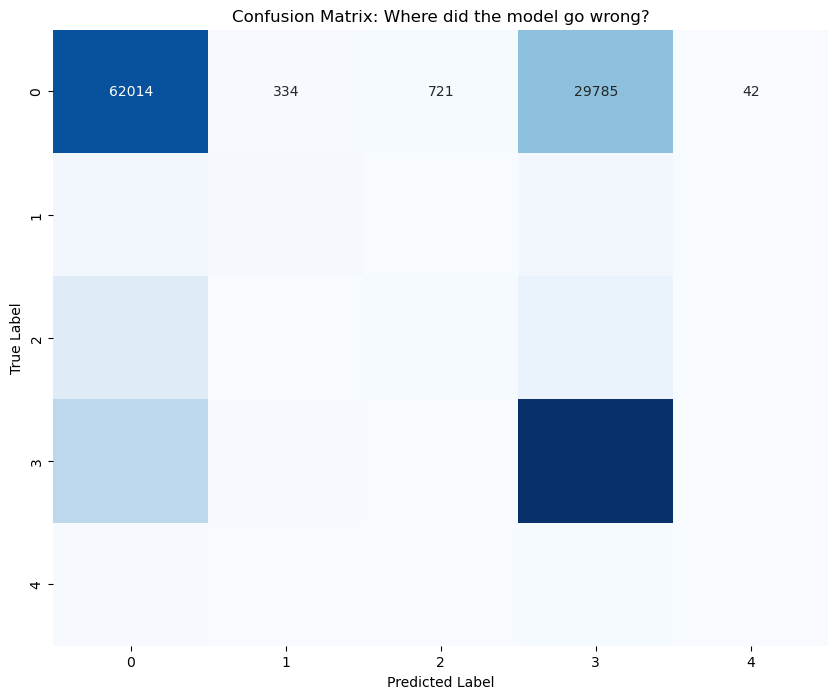

In [ ]:
import matplotlib
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Create the matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Where did the model go wrong?')
plt.show()

In [ ]:
import sys

# This forces the install into the CURRENT active environment
print(f"Installing into: {sys.executable}")
!{sys.executable} -m pip install xgboost

Installing into: c:\Users\Elitebook\anaconda3\python.exe


In [ ]:
import xgboost as xgb
print("XGBoost version:", xgb.__version__)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Note the % sign at the start. This is the "Magic" command.
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Once that finishes, force the kernel to acknowledge it immediately
import importlib
import xgboost as xgb
importlib.reload(xgb)

print("Success! XGBoost version:", xgb.__version__)

ModuleNotFoundError: No module named 'xgboost'